# Polynomial Regression

Sometimes we have data that does not merely follow a linear trend.                       
We sometimes have data that follows a polynomial trend. Therefore,                          
we are going to use polynomial regression. Before digging into its                    
implementation, we need to know how the graphs of some primary polynomial data look.

Polynomial Functions and Their Graphs:


In [2]:
import matplotlib.pyplot as plt
import numpy as np


# a. graph for y = x

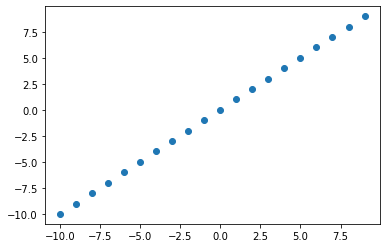

In [4]:
x = np.arange(-10,10)
y=x

plt.scatter(x,y)

# b. Graph for Y = X²:

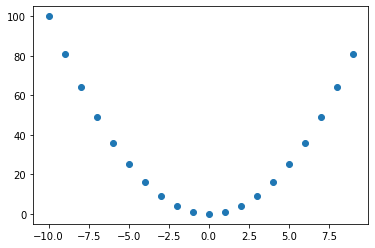

In [5]:
x = np.arange(-10,10)
y = np.power(x,2)

plt.scatter(x,y)

# c. Graph for Y = X³:

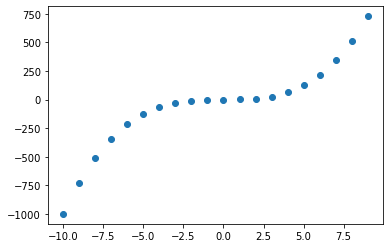

In [6]:
x = np.arange(-10,10)
y = np.power(x,3)

plt.scatter(x,y)

# d. Graph with more than one polynomials: Y = X³+X²+X:

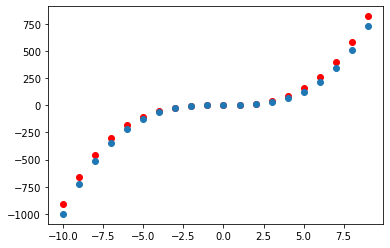

In [7]:
x = np.arange(-10,10)
y = np.power(x,3)
y1 = np.power(x,3) + np.power(x,2) + x
plt.scatter(x,y1,c='red')
plt.scatter(x,y)

In the graph above, we can see that the red dots show the graph for Y=X³+X²+X                
and the blue dots shows the graph for Y = X³. Here we can see that the most                          
prominent power influences the shape of our graph.

Below is the formula for polynomial regression:

            Y = b0 + b1*X1 + b2*X2 + ... + bn*Xn
            where,
                           Y     =    Output
                           X     =    input feature
                       b0,b1,bn  =    coefficents

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('D:/CSV_Data/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

dataset: the table contains all values in our csv file                                                                    
X: the 2nd column which contains Years Experience array                                                                 
y: the last column which contains Salary array                                                                    
Let’s split our dataset to get training set and testing set (both X and y values per each set)

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

* test_size=0.2: we will split our dataset (10 observations) into 2 parts (training set, test set) and the ratio of test set compare to dataset is 0.2 (2 observations will be put into the test set. You can put it 1/5 to get 20% or 0.2, they are the same. We should not let the test set too big; if it’s too big, we will lack of data to train. Normally, we should pick around 5% to 30%.                                                                                                         
* train_size: if we use the test_size already, the rest of data will automatically be assigned to train_size.                    
* random_state: this is the seed for the random number generator. We can put an instance of the RandomState class as well. If we leave it blank or 0, the RandomState instance used by np.random will be used instead.                                        
* We already have the train set and test set, now we have to build the Regression Model. Firstly, we will build a Linear         Regression model and visualize it 

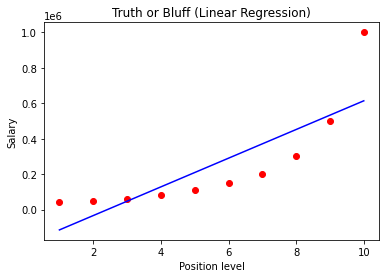

In [12]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Now we will build the Polynomial Regression model and visualize it to see the differences:

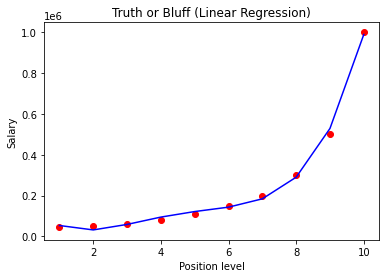

In [13]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)

X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

let’s predict the value of our candidate (with 5.5 YE) using both Linear Regression model and Polynomial Regression model:

In [16]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
print("Linear Regression : ", lin_reg.predict([[5.5]]))

# Predicting a new result with Polymonial Regression
pol_pre = pol_reg.predict(poly_reg.fit_transform([[5.5]]))
print("Polynomial linear regression prediction : ", pol_pre)

Linear Regression :  [249500.]
Polynomial linear regression prediction :  [132148.43750002]


But the predicted salary using Linear Regression lin_reg is $249,500.                
It’s unacceptable (but still in the range of -10,000 to 300,000 according                        
to Linear Regression)! What’s about using Polynomial Regression?                      
Our pol_reg value is $132,148.43750 which is very close to our Mean value which is $130,000.